# Data Mining with KDD-99

## Data extraction
### Abstract
<p>This is the data set used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between "bad" connections, called intrusions or attacks, and "good" normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.</p>
<p>We can get the data from this website ('http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html')</p>

### Data description
The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  The 1999 KDD intrusion detection contest uses a version of this dataset.

Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN.  They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.

The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic.  This was processed into about five million connection records.  Similarly, the two weeks of test data yielded around two million connection records.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

- DOS: denial-of-service, e.g. syn flood;
- R2L: unauthorized access from a remote machine, e.g. guessing password;
- U2R:  unauthorized access to local superuser (root) privileges, e.g., various "buffer overflow" attacks;
- probing: surveillance and other probing, e.g., port scanning.

It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.  The datasets contain a total of 24 training attack types, with an additional 14 types in the test data only.

### Download the data set
We download the prediction data set and training data set from the official website, and then  we use python to read the data

In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

'''load the data'''
df_train = pd.read_csv('/Users/chenshihui/PycharmProjects/xianyu/KDD99/KDD99_data/kddcup.data_10_percent', header=None)
df_test = pd.read_csv('/Users/chenshihui/PycharmProjects/xianyu/KDD99/KDD99_data/corrected', header=None)

/Users/chenshihui/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Data cleanup
We clean the data by the below steps

- renaming columns

In [2]:
# set columns for the data
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
                'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_hot_login',
                'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
                'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
                'dst_host_srv_rerror_rate', 'types']
df_train.columns, df_test.columns = column_names, column_names

- test the missing value

In [3]:
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())

0
0


## Data visualization

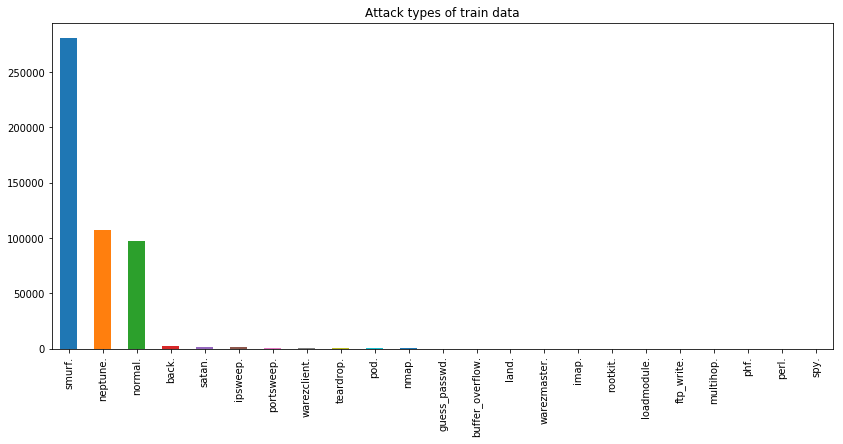

In [4]:
(df_train['types'].value_counts()).plot(kind='bar', figsize=(14, 6))
plt.title('Attack types of train data')
plt.show()

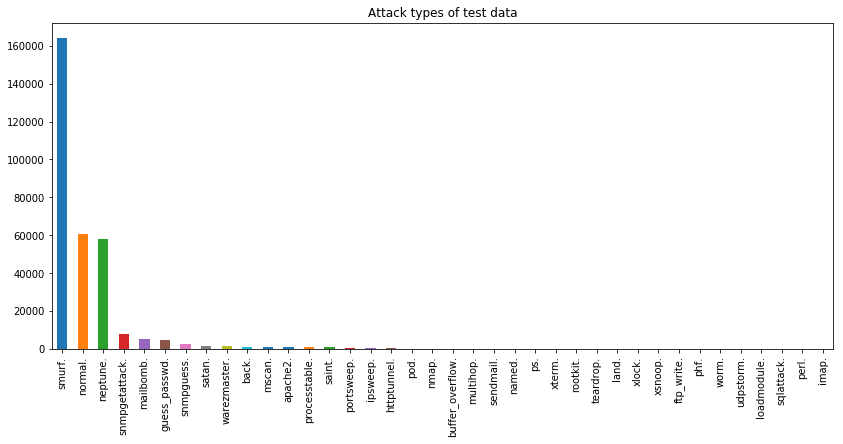

In [5]:
(df_test['types'].value_counts()).plot(kind='bar', figsize=(14, 6))
plt.title('Attack types of test data')
plt.show()

It can be seen from the visualization graphs of attack types of both train data and test data that the smurf has the largest number of all the attacks typs, and it belongs to the attack category of DOS. The second is the normal, and then neptune.

## Descriptive analytics
First, we divide the data into continuous variables and discrete variables. Then we do descriptive statistics for continuous variables.

In [6]:
# get the columns'name of the continuous variables
con_var = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
           'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
           'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

In [7]:
df_train[con_var].describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.006433,0.000014,0.034519,0.000152,0.010212,0.011352,0.001083,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.134805,0.005510,0.782103,0.015520,1.798326,2.012718,0.096416,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,3.000000,3.000000,30.000000,5.000000,884.000000,993.000000,28.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


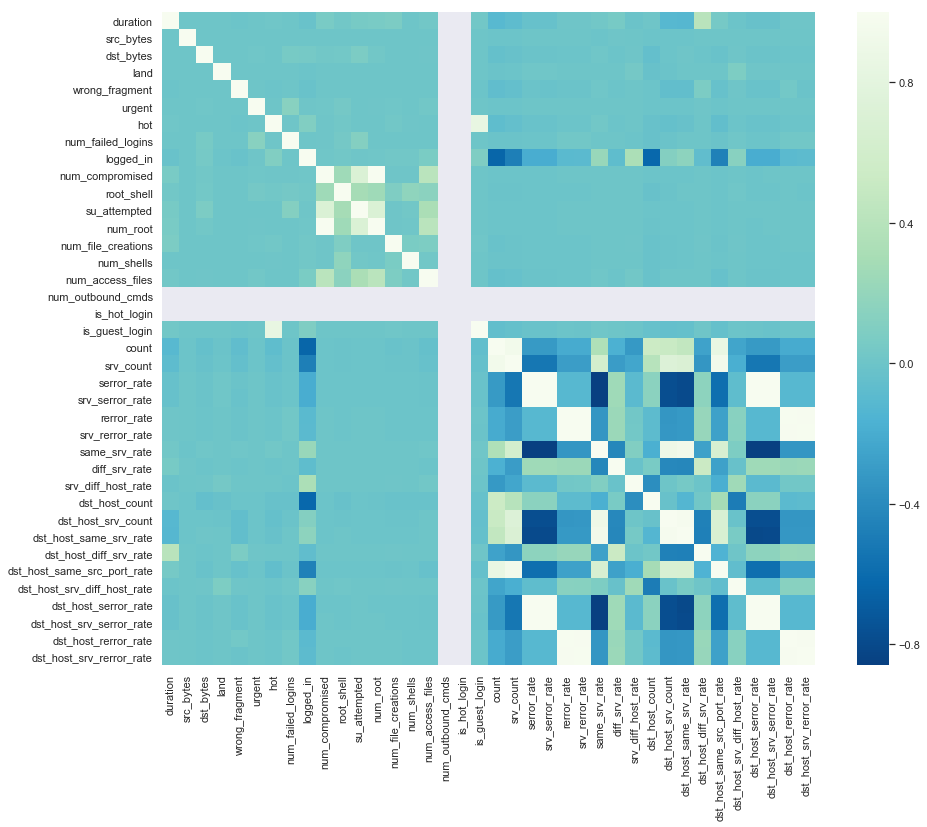

In [8]:
# Correlation heat map of train data
sns.set(rc={'figure.figsize':(15, 12)})
sns.heatmap(df_train.corr(), cmap='GnBu_r', square=True, annot=False)
plt.show()

In [9]:
df_test[con_var].describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000762,0.000051,0.014677,0.002363,0.011243,0.008359,0.000958,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.040367,0.009821,0.312068,0.049990,1.958325,2.165196,0.193119,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,3.000000,3.000000,101.000000,4.000000,796.000000,878.000000,100.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


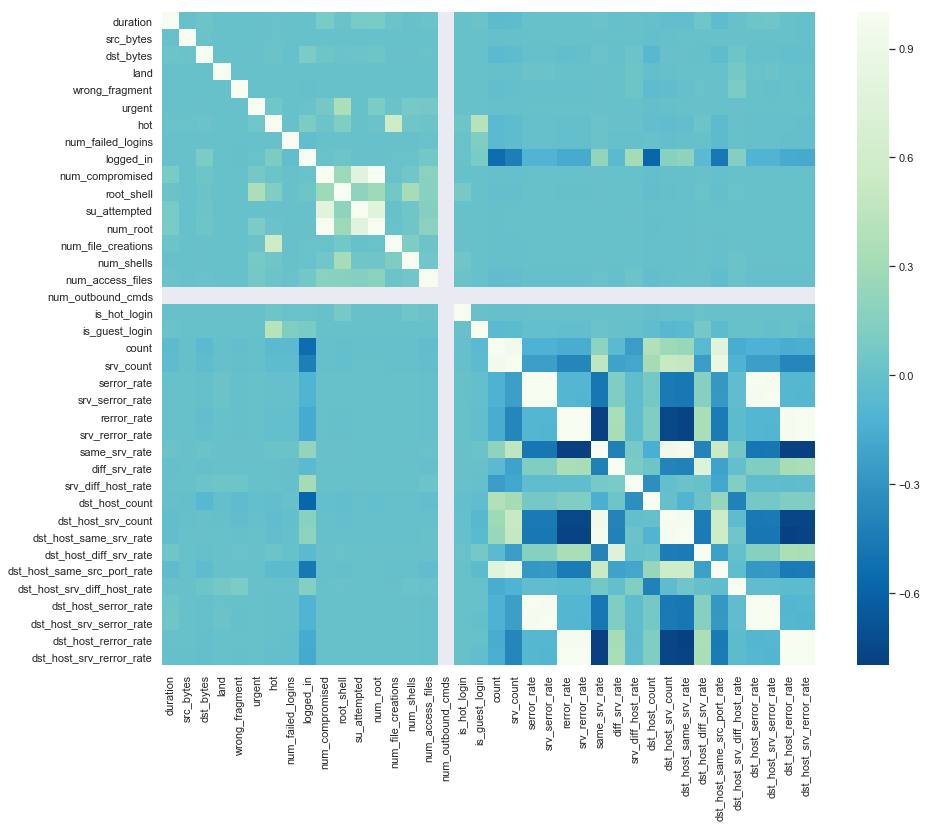

In [10]:
# Correlation heat map of train data
sns.set(rc={'figure.figsize':(15, 12)})
sns.heatmap(df_test.corr(), cmap='GnBu_r', square=True, annot=False)
plt.show()

## Extra credits
We use decision tree and random forest machine learning models to predict the attack type respectively, and then compare the accuracy of the two types of model predictions

Before modeling, we need to do some additional data cleaning works to make our model more efficient

- text replacement

In [11]:
str_columns = ['protocol_type', 'service', 'flag']
for col in str_columns:
    encCG = LE()
    df_train[col] = encCG.fit_transform(df_train[col])
    df_test[col] = encCG.fit_transform(df_test[col])
    print(pd.DataFrame(encCG.classes_))

      0
0  icmp
1   tcp
2   udp
              0
0           IRC
1           X11
2        Z39_50
3          auth
4           bgp
5       courier
6      csnet_ns
7           ctf
8       daytime
9       discard
10       domain
11     domain_u
12         echo
13        eco_i
14        ecr_i
15          efs
16         exec
17       finger
18          ftp
19     ftp_data
20       gopher
21    hostnames
22         http
23     http_443
24         icmp
25        imap4
26     iso_tsap
27       klogin
28       kshell
29         ldap
..          ...
35   netbios_ns
36  netbios_ssn
37      netstat
38         nnsp
39         nntp
40        ntp_u
41        other
42      pm_dump
43        pop_2
44        pop_3
45      printer
46      private
47   remote_job
48          rje
49        shell
50         smtp
51      sql_net
52          ssh
53       sunrpc
54       supdup
55       systat
56       telnet
57       tftp_u
58        tim_i
59         time
60        urp_i
61         uucp
62    uucp_path
63      

- Create a dictionary of sub-category tags and replace them with five major categories
- Separate features and labels

In [12]:
label_dict = {'normal.': 0,
              'PROBE.': 1, 'ipsweep.': 1, 'mscan.': 1, 'nmap.': 1, 'portsweep.': 1, 'saint.': 1, 'satan.': 1,
              'DOS.': 2, 'apache2.': 2, 'back.': 2, 'land.': 2, 'mailbomb.': 2, 'neptune.': 2,  'pod.': 2,
              'processtable.': 2, 'smurf.': 2, 'teardrop.': 2, 'udpstorm.': 2,
              'U2R.': 3, 'buffer_overflow.': 3, 'httptunnel.': 3, 'loadmodule.': 3, 'perl.': 3, 'ps.': 3,
              'rootkit.': 3, 'sqlattack.': 3, 'xterm.': 3,
              'R2L.': 4, 'ftp_write.': 4, 'guess_passwd.': 4, 'imap.': 4, 'multihop.': 4, 'named.': 4, 'phf.': 4,
              'sendmail.': 4, 'snmpgetattack.': 4, 'snmpguess.': 4, 'spy.': 4, 'warezclient.': 4, 'warezmaster.': 4,
              'worm.': 4, 'xlock.': 4, 'xsnoop.': 4}
label_list = list(label_dict)

def label_trans(df):
    unique_type = np.unique(df['types'])
    for i in range(len(unique_type)):
        type_ = unique_type[i]
        df['types'] = [str(x).replace(type_, str(label_dict[type_])) for x in df['types']]
    df['types'] = df['types'].astype('int')   
    df = df.replace('None', np.nan).dropna()
    x = df.iloc[:, 0:-1]
    y = df.iloc[:, -1]
    return x, y


x_train, y_train = label_trans(df_train)
x_test, y_test = label_trans(df_test)

- Data normalization

In [13]:
scaler = MinMaxScaler()

def get_scaler(df):
    for col in con_var:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    return df

x_train_scaled = get_scaler(x_train)
x_test_scaled = get_scaler(x_test)

- Create the models

In [14]:
def DecisionTree(x_train_scaled, y_train, x_test_scaled):
    print('**************** Decision Tree *********************')
    model = DecisionTreeClassifier()

    # traning
    start = time.time()
    model.fit(x_train_scaled, y_train)
    end = time.time()
    print('training time: ', end-start)

    # testing
    start = time.time()
    pred = model.predict(x_test_scaled)
    end = time.time()
    print('testing time: ', end - start)
    return model, pred


def random_forest(x_train_scaled, y_train, x_test_scaled):
    print('**************** Random Forest *********************')
    model = RandomForestClassifier(n_estimators=500)

    # traning
    start = time.time()
    model.fit(x_train_scaled, y_train)
    end = time.time()
    print('training time: ', end-start)

    # testing
    start = time.time()
    pred = model.predict(x_test_scaled)
    end = time.time()
    print('testing time: ', end - start)
    return model, pred

- Create evaluation index

In [15]:
def model_eval(y_test, pred, n):
    print(classification_report(y_test, pred))  
    con_mat = confusion_matrix(y_test, pred)
    print("confusion_matrix：\n", con_mat)

    classes = n
    con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]
    con_mat_norm = np.around(con_mat_norm, decimals=2)

    # === plot ===
    sns.set(rc={'figure.figsize':(10, 8)})
    sns.heatmap(con_mat_norm, annot=True, cmap='Blues')
    plt.ylim(0, classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

- The result of Decision Tree

**************** Decision Tree *********************
training time:  2.6620991230010986
testing time:  0.28238606452941895
             precision    recall  f1-score   support

          0       0.74      0.99      0.85     60593
          1       0.91      0.75      0.82      4166
          2       1.00      0.97      0.98    229853
          3       0.01      0.03      0.01       228
          4       0.59      0.07      0.13     16189

avg / total       0.92      0.93      0.91    311029

confusion_matrix：
 [[ 59838    258    476      6     15]
 [   406   3134    525      2     99]
 [  5462     31 223694      0    666]
 [   154     31     28      6      9]
 [ 14482      8      3    560   1136]]


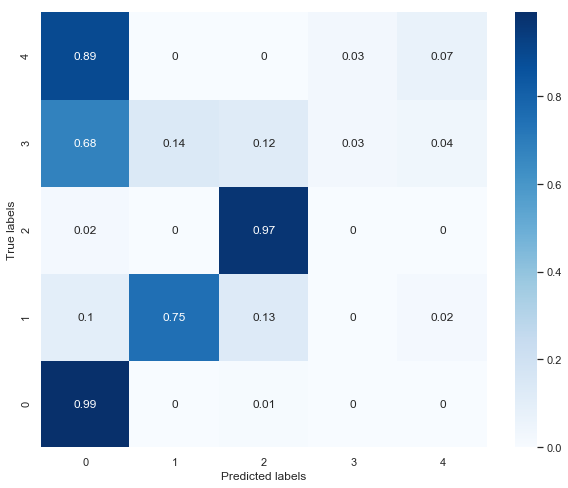

In [16]:
model1, pred1 = DecisionTree(x_train_scaled, y_train, x_test_scaled)
model_eval(y_test, pred1, 5)

- The result of Random Forest

**************** Random Forest *********************
training time:  163.86879706382751
testing time:  20.453475952148438
             precision    recall  f1-score   support

          0       0.72      1.00      0.84     60593
          1       0.93      0.75      0.83      4166
          2       1.00      0.97      0.99    229853
          3       0.50      0.01      0.03       228
          4       1.00      0.04      0.07     16189

avg / total       0.94      0.92      0.91    311029

confusion_matrix：
 [[ 60311    221     58      2      1]
 [   856   3104    206      0      0]
 [  6287      9 223557      0      0]
 [   212     12      0      3      1]
 [ 15610      0      1      1    577]]


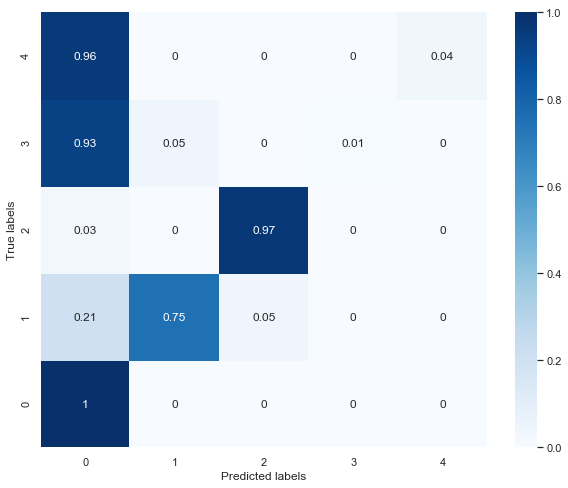

In [17]:
model2, pred2 = random_forest(x_train_scaled, y_train, x_test_scaled)
model_eval(y_test, pred2, 5)